
# Single Value Decomposition (SVD)

SVD puede ser usado en el contexto de imágenes para comprimir fotos. Si en lugar de guardar la foto entera (Matriz M de la clase), uno guardase una representación reducida de esta matriz (B) y la manera de pasar de un espacio a otro (V*), entonces un se podría ahorrar mucho espacio en el guardado de la foto. Este mismo proceso se utiliza a veces en imágenes y señales para reducir el ruido de las mismas (proceso llamdo denoising)

Primero cargamos la foto. Para eso vamos a usar el dataset `sample_images` de Sklearn.

In [1]:
from sklearn.datasets import load_sample_image
import io
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

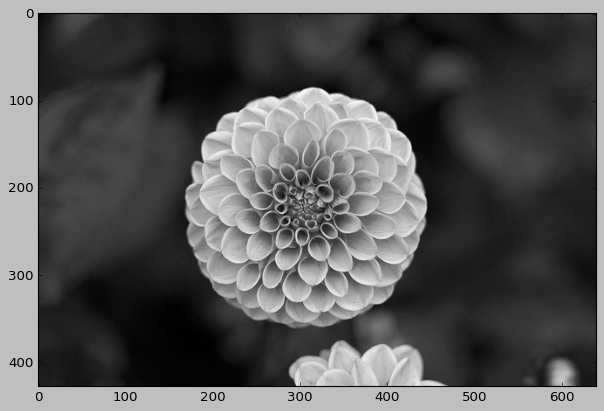

In [2]:
plt.style.use('classic')
img = load_sample_image("flower.jpg")
image_grayscale = img.mean(axis=2).astype(np.float32)

plt.figure(figsize=(9, 6))
plt.imshow(image_grayscale, cmap='gray')
plt.show()

In [3]:
image_grayscale.shape

(427, 640)

Vamos a usar la versión clasica del algoritmo de SVD que viene en numpy.

In [4]:
U, D, V = np.linalg.svd(image_grayscale)

Inspeccionemos la dimensión de los elementos:

In [5]:
image_grayscale.shape

(427, 640)

In [6]:
U.shape

(427, 427)

In [7]:
D.shape

(427,)

In [8]:
V.shape

(640, 640)

Así como está, si multiplicamos adecuadamente estos tres elementos, recuperariamos la foto original. Veamos que si tomamos los valores singulares tendremos la imagen original nuevamente:

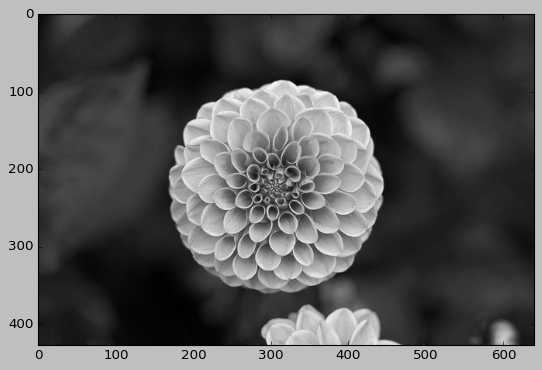

In [10]:
reconstimg = np.matrix(U[:, :427]) * np.diag(D[:427]) * np.matrix(V[:427, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

El objetivo pasa por tomar unicamente los valores singulares mas altos. Por una cuestión de comodidad, los valores en D ya están ordenados de menor a mayor, siendo los primeros los de mayor valor. Podemos probar tomando menos valores singulares:

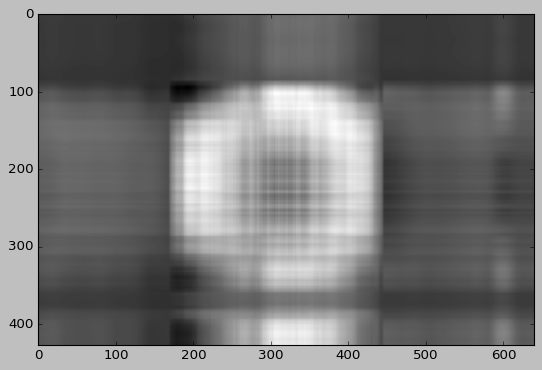

In [11]:
reconstimg = np.matrix(U[:, :2]) * np.diag(D[:2]) * np.matrix(V[:2, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

In [13]:
reconstimg.reshape(reconstimg.size) #toma la matriz bidimensional que representa una imagen y la convierte en un arreglo unidimensional.

matrix([[18.597492, 18.720106, 18.766275, ..., 47.60921 , 47.94834 ,
         48.16192 ]], dtype=float32)

Ya comenzamos a visualizar al menos un objeto en el centro de la imagen, para tener tan poca información, esta bien. Vamos a tomar una cantidad mas relevante de valores singulares:

In [14]:
A = reconstimg.reshape((reconstimg.size,))
A.shape

(1, 273280)

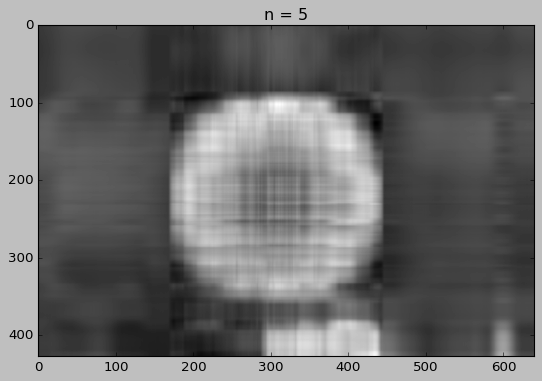

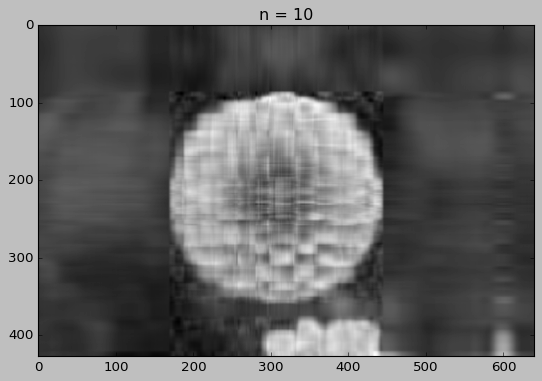

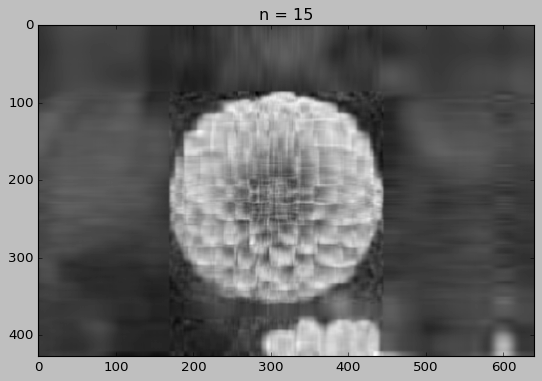

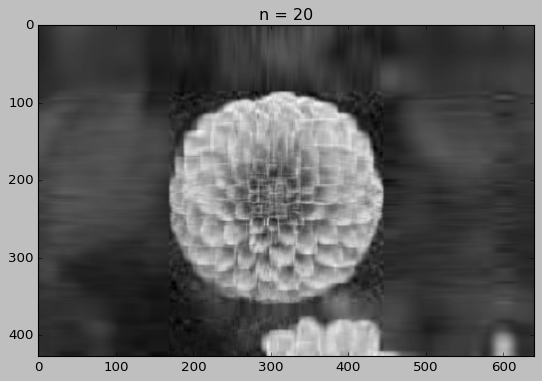

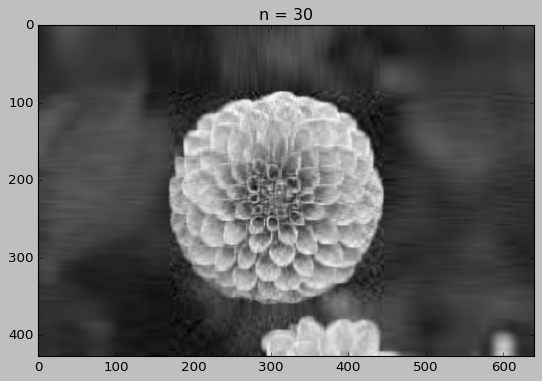

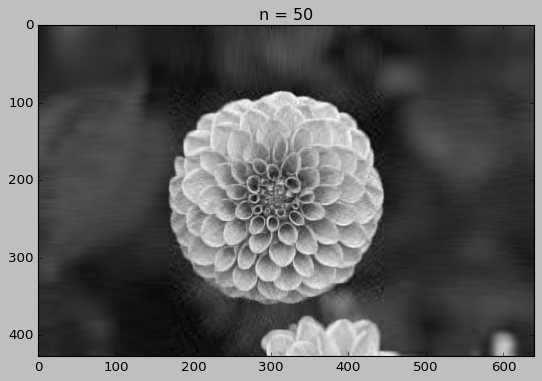

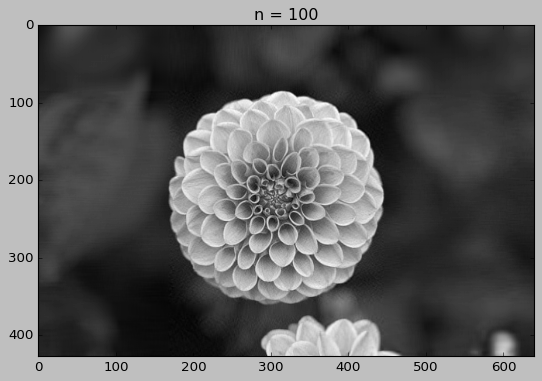

In [15]:
for i in [5, 10, 15, 20, 30, 50,100]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

# Principal Component Analysis

PCA es uno de los algortimos más utilizados para reducir la dimensionalidad de un dataset. Cuando aumenta la dimensionalidad de los datos, el volumen del espacio aumenta exponencialmente, haciendo que los datos disponibles se encuentren más dispersos.

El PCA selecciona las direcciones con mayor variabilidad. Permitiendo eliminar las direcciones con menor variabilidad, ya que poseen menos información.

Utilizaremos el dataset Iris y veamos primero como se ve si graficamos los datos utilizando solo dos features.

In [16]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [17]:
iris = load_iris()

X = iris.data
y = iris.target
features = iris.feature_names

df = pd.DataFrame(X, columns=features)
df['Label'] = y
df['Species']=df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

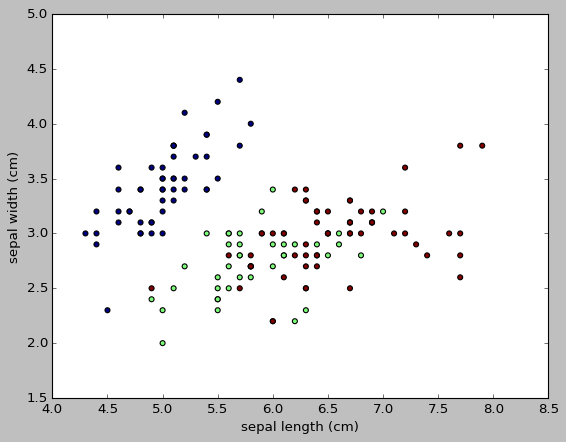

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(features[0])
plt.ylabel(features[1]);

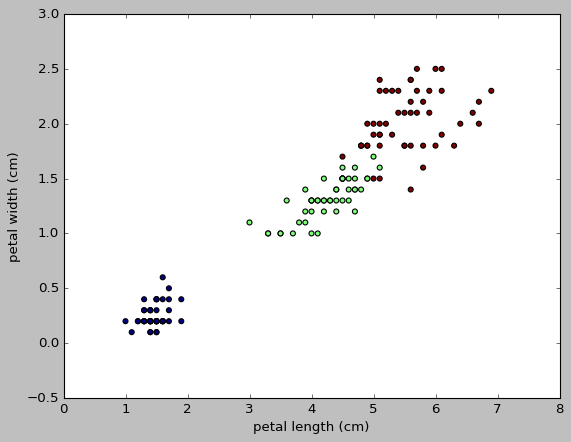

In [19]:
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel(features[2])
plt.ylabel(features[3]);

Ahora utilizemos el analisis de componentes principales para capturar la información de las cuatro dimensiones en solo dos.

**Pasos del PCA:**

**Centrar los datos:** El primer paso es restar la media de cada
variable para centrar los datos en el origen.

**Cálculo de la matriz de covarianza:** Luego, se calcula la matriz de covarianza de los datos centrados.

**Descomposición de la matriz de covarianza:** Se descompone la matriz de covarianza en sus componentes principales, que son los autovectores de la matriz. Estos autovectores representan las direcciones de máxima varianza.

**Selección de componentes principales:** Puedes seleccionar un subconjunto de los componentes principales para reducir la dimensionalidad.

**Transformación de datos:** Finalmente, se transforman los datos originales en el nuevo espacio de características definido por los componentes principales.

In [20]:
# Transformo los features
pca = PCA(n_components=2)  #reducir la dimensionalidad a 2 componentes principales
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_merged = pd.merge(df, pca_df, right_index=True, left_index=True)

In [23]:
df_merged.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label,Species,PC1,PC2
0,5.1,3.5,1.4,0.2,0,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,setosa,-2.728717,0.326755


In [21]:
pca_df.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [22]:
print('Varianza explicada')
for i in range(2):
    print('PC{}: {}'.format(i+1, pca.explained_variance_ratio_[i]))

Varianza explicada
PC1: 0.9246187232017271
PC2: 0.05306648311706782


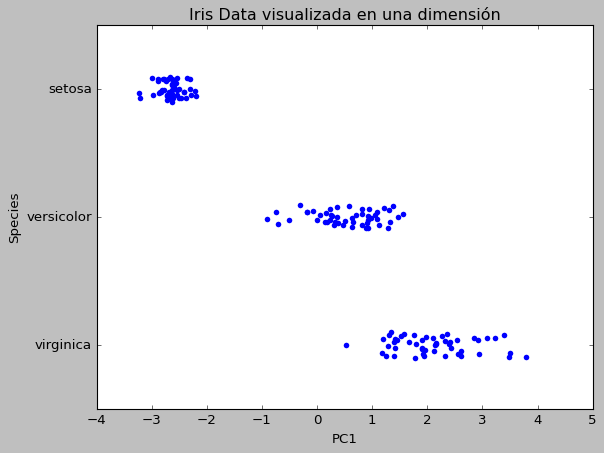

In [24]:
sns.stripplot(x="PC1", y="Species", data=df_merged, jitter=True)
plt.title('Iris Data visualizada en una dimensión');

#se visualizan las proyecciones de la primera componente principal (PC1) en relación con las diferentes especies de flores Iris.

Text(0.5, 1.0, 'Iris Data visualizados en dos dimensiones')

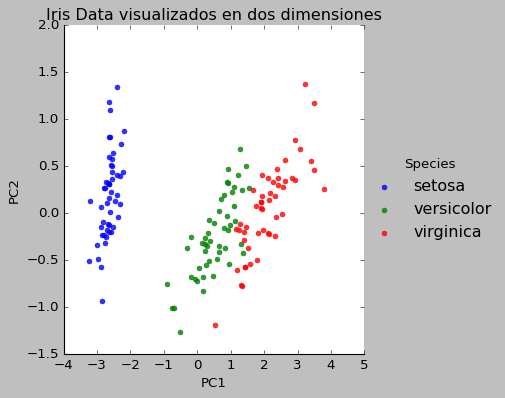

In [28]:
sns.lmplot(x='PC1', y='PC2', data=df_merged, fit_reg=False, hue='Species')
plt.title('Iris Data visualizados en dos dimensiones')

#gráfico de dispersión bidimensional en el que se visualizan las proyecciones de las dos primeras componentes principales (PC1 y PC2)

In [29]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley, color="#c7e9c0", edgecolor="#006d2c", alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='#253494',alpha=0.5,lw=2)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color="#000000", ha="center", va="center")
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color="#000000", ha="center", va="center")
    plt.xlim(-.75,1)
    plt.ylim(-0.5,1)
    plt.grid(False)
    plt.xticks(np.arange(0, 1, 0.5), size=12)
    plt.yticks(np.arange(-0.75, 1, 0.5), size=12)
    plt.xlabel("Component 1", size=14)
    plt.ylabel("Component 2", size=14)
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);

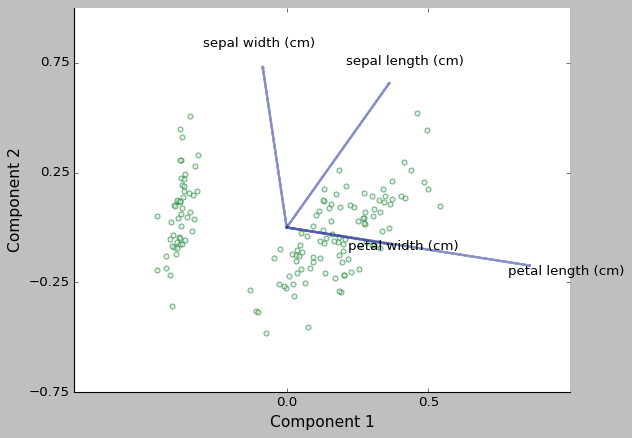

In [32]:
array_pca = np.array(pca_df)
biplot(array_pca[:, 0:2], np.transpose(pca.components_[0:2, :]), labels=df.columns)

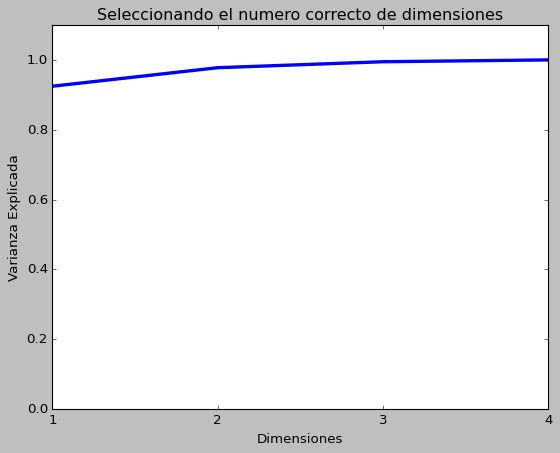

In [31]:
pca_test = PCA()
pca_test.fit(X)

cumsum = np.cumsum(pca_test.explained_variance_ratio_)
dim = np.arange(len(cumsum)) + 1

plt.plot(dim, cumsum, '-', lw=3);

plt.xlabel('Dimensiones')
plt.ylabel('Varianza Explicada')
plt.title('Seleccionando el numero correcto de dimensiones')

plt.xticks([1, 2, 3, 4])
plt.ylim([0, 1.1]);

In [34]:
'''
Ayuda a determinar cuántas dimensiones (componentes principales) necesitas retener para mantener una cantidad significativa
de la varianza en tus datos.
Si la curva alcanza un valor cercano a 1, las dimensiones principales capturan la mayor parte de la información en tus datos.

'''

'\nAyuda a determinar cuántas dimensiones (componentes principales) necesitas retener para mantener una cantidad significativa \nde la varianza en tus datos. \nSi la curva alcanza un valor cercano a 1, las dimensiones principales capturan la mayor parte de la información en tus datos.\n\n'